# Satellite Land Cover completeness for Spatial Planning and Land Management

Production date: 22-10-2024

Produced by: +ATLANTIC

## 🌍 Use case: Using land cover products to monitor Land Cover (LC) changes

## ❓ Quality assessment question
* **How consistent are satellite observations in capturing land cover changes, such as urbanization?**

Land Cover data is an invaluable resource for a wide range of fields, from climate change research to urban planning. Land Cover products that provide historical timelines enable scientists, policymakers, and planners to understand and analyse the transformation of land cover over decades.

In this Notebook we will use the ***Land cover classification gridded maps from 1992 to present derived from satellite observations*** (henceforth, LC) data from the Climate Data Store (CDS) of the Copernicus Climate Change Service ([C3S](https://climate.copernicus.eu/esotc/2023)) to analyse the spatial patterns of the LC over a given Area of Interest (AoI) and time. 

## 📢 Quality assessment statement

* The dataset demonstrates physical consistency and precision among the different datasets as it aligns closely with equivalent statistics from official sources and peer-reviewed studies ([[1]](https://doi.org/10.1016/j.apgeog.2009.07.003),[[2]](https://doi.org/10.3390/land7030099), [[3]](https://ec.europa.eu/statistical-atlas/viewer/?ch=gridvizChapter&mids=BKGCNT,totalPop21,CNTOVL&o=1,1,0.7&center=40.94812,-2.2287,5&lcis=totalPop21&)). Specifically, our analysis shows that the Urban/Settlements category closely matches EUROSTAT's statistics  for the 2018 Artificial Land and Wetland categories in the most populated NUTs 2 regions, with only a very small 5 to 8% percentage difference .

* Another aspect of the analysis supporting the dataset's precision is the identification of trade-offs between urban expansion and the decline of agricultural areas, a well-documented phenomenon. Numerous studies, including observations across multiple European regions, note that urban growth frequently replaces agricultural lands [[4]](https://doi.org/10.1088/1748-9326/9/6/064015).

* The results of this notebook also show that the spatial resolution is sufficient to detect regional differences, and the temporal resolution is adequate to highlight annual variations, ensuring a comprehensive understanding of patterns over time.

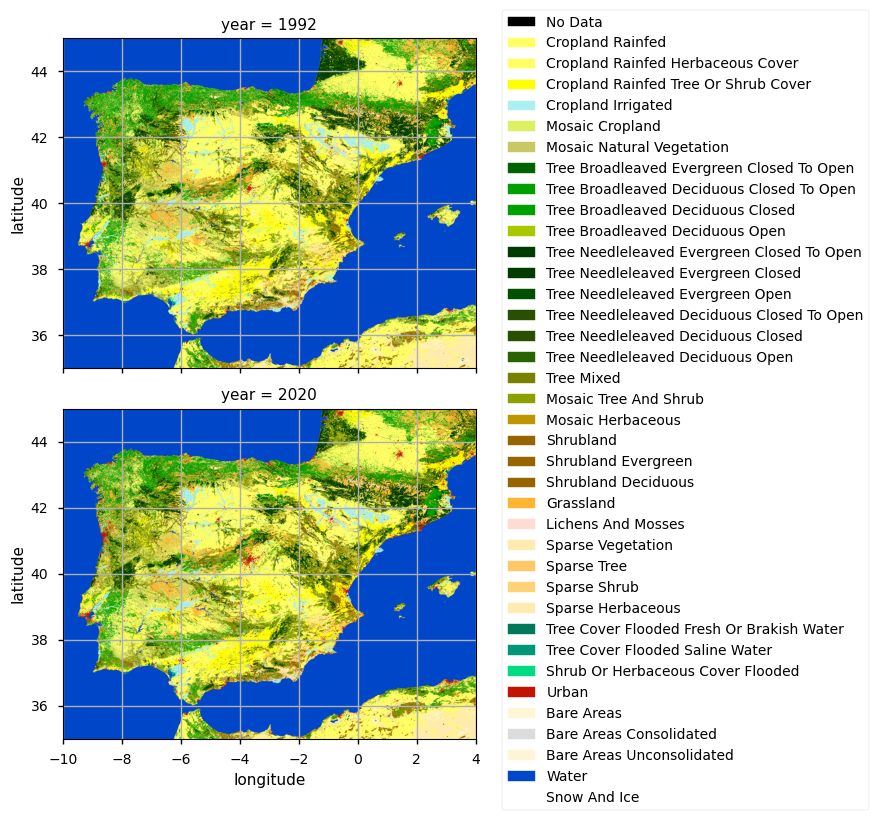

## 📋 Methodology

**[1.Analysis and results](C3S2_D520.5.3.2b_Quality_Assessment_User_Questions_LULC_UQ1_v1.17:code-section-1)**

**[2.Inspect and view data](C3S2_D520.5.3.2b_Quality_Assessment_User_Questions_LULC_UQ1_v1.17:code-section-2)**

**[3.Calculate total area and area percentage of change in for AoI by LC classes](C3S2_D520.5.3.2b_Quality_Assessment_User_Questions_LULC_UQ1_v1.17:code-section-3)**

**[4.Calculate the area percentage and the area percentage change for the most populated regions](C3S2_D520.5.3.2b_Quality_Assessment_User_Questions_LULC_UQ1_v1.17:code-section-4)**

**[5.Main Takeaways](C3S2_D520.5.3.2b_Quality_Assessment_User_Questions_LULC_UQ1_v1.17:code-section-5)**

## 📈 Analysis and results

(C3S2_D520.5.3.2b_Quality_Assessment_User_Questions_LULC_UQ1_v1.17:code-section-1)=
### 1. Define the AoI, search and download LC data.

Before we begin we must prepare our environment. This includes installing the Application Programming Interface (API) of the CDS, and importing the various python libraries that we will need.

#### Import all the libraries/packages

We will be working with data in NetCDF format. To best handle this type of data we will use libraries for working with multidimensional arrays, in particular Xarray. 
We will also need libraries for plotting and viewing data.

In [1]:
import geopandas as gpd # import vector geospatial data
import matplotlib.pyplot as plt # plot graphs
import matplotlib.patches as patches 
import numpy as np # perform trigonometric calculations
import shapely.geometry # work with geometric shapes
import regionmask # transform attributes and geometries into specific regions
import xarray as xr
import numpy as np
from c3s_eqc_automatic_quality_control import download, plot, utils 

plt.style.use("seaborn-v0_8-notebook") # predifined style of all graphical outputs

#### Data Overview

To search for data, visit the CDS website: http://cds.climate.copernicus.eu. Here you can search for 'Satellite observations' using the search bar. The data we need for this tutorial is the ***Land cover classification gridded maps from 1992 to present derived from satellite observations***. This catalogue entry provides global Land Cover Classification (LCC) maps with a very high spatial resolution, with a L4 processing level, on an annual basis with a one-year delay, following the [Global Climate Observing System (GCOS) convention requirements](https://library.wmo.int/records/item/58111-the-2022-gcos-ecvs-requirements-gcos-245). LULC maps correspond to a global classification scheme, encompassing 22 classes. For intercomparison consistency, following IPCC guideline, <ins>LC classes are grouped into the six IPCC land categories:</ins> **cropland, forest, grassland, wetland, settlement, and other land (shrubland, sparse vegetation, bare area and water)**.

The dataset consists of 2 versions (v2.0.7 produced by the European Space Agency (ESA) Climate Change Initiative (CCI) and v2.1.1 produced by Copernicus Climate Change Service (C3S)).

Data specifications for this use case:
- Year: 1992 and 2020
- Version: v2.0.7 for 1992 and v2.1.1 for 2020
- Format: Zip files

At the end of the download form, select `Show API request`. This will reveal a block of code, which you can simply copy and paste into a cell of your Jupyter Notebook …

Having copied the API request to a Jupyter Notebook cell, running it will retrieve and download the data you requested into your local directory. However, before you run it, the `terms and conditions` of this particular dataset need to have been accepted directly at the CDS website. The option to view and accept these conditions is given at the end of the download form, just above the `Show API request` option. In addition, it is also useful to define the time period and AoI parameters and edit the request accordingly, as exemplified in the cells below.

In [2]:
#Years to download
years = [1992, 2020]

In [3]:
# List of requests to retrieve data
collection_id = "satellite-land-cover"
requests = [
    {
        "variable": "all",
        "format": "zip",
        "version": "v2_0_7cds" if year < 2016 else "v2_1_1",
        "year": str(year),
        "area": [45, -10, 35, 4] # Region of interest (Iberian Peninsula)
    }
    for year in years
]

In [4]:
# Download and regionalize by AoI
ds = download.download_and_transform(
    collection_id,
    requests,
)
ds = ds.assign_coords(year=ds["time"].dt.year).swap_dims(time="year").drop("time")


  0%|          | 0/2 [00:00<?, ?it/s]

100%|██████████| 2/2 [00:00<00:00,  5.75it/s]
/home/ines/miniconda3/envs/bopen/lib/python3.10/site-packages/xarray/core/concat.py:532: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


(C3S2_D520.5.3.2b_Quality_Assessment_User_Questions_LULC_UQ1_v1.17:code-section-2)=
### 2. Inspect and view data

Now that we have downloaded the data, we can inspect it. We have requested the data in NetCDF format. This is a commonly used format for array-oriented scientific data. To read and process this data we will make use of the Xarray library. Xarray is an open source project and Python package that makes working with labelled multi-dimensional arrays simple and efficient. We will read the data from our NetCDF file into an xarray

#### Label Color Definition and Class Correspondence

To facilitate visual inspection of the LC classes, we will define a dictionary containing each class label ('keys', below) and the corresponding color ('colors', below) and numeric flag ('values), below. In additon, we will also create a second dictionary to define the correspondence between the original classes of our metadata and the IPCC classes, as described in the Product User Guide (see References).

In [5]:
# Define LC labels dictionary
keys = ds.lccs_class.flag_meanings.split()
colors = ds.lccs_class.flag_colors.split()
element = "#000000"
colors.insert(0, element)
values = ds.lccs_class.flag_values

lccs_dict = {key: (color, value) for key, color, value in zip(keys, colors, values)}

# Helper function to format the labels text
def format_key(key):
    return key.replace("_", " ").title()

lccs_dict = {format_key(key): value for key, value in lccs_dict.items()}
lccs_dict

{'No Data': ('#000000', 0),
 'Cropland Rainfed': ('#ffff64', 10),
 'Cropland Rainfed Herbaceous Cover': ('#ffff64', 11),
 'Cropland Rainfed Tree Or Shrub Cover': ('#ffff00', 12),
 'Cropland Irrigated': ('#aaf0f0', 20),
 'Mosaic Cropland': ('#dcf064', 30),
 'Mosaic Natural Vegetation': ('#c8c864', 40),
 'Tree Broadleaved Evergreen Closed To Open': ('#006400', 50),
 'Tree Broadleaved Deciduous Closed To Open': ('#00a000', 60),
 'Tree Broadleaved Deciduous Closed': ('#00a000', 61),
 'Tree Broadleaved Deciduous Open': ('#aac800', 62),
 'Tree Needleleaved Evergreen Closed To Open': ('#003c00', 70),
 'Tree Needleleaved Evergreen Closed': ('#003c00', 71),
 'Tree Needleleaved Evergreen Open': ('#005000', 72),
 'Tree Needleleaved Deciduous Closed To Open': ('#285000', 80),
 'Tree Needleleaved Deciduous Closed': ('#285000', 81),
 'Tree Needleleaved Deciduous Open': ('#286400', 82),
 'Tree Mixed': ('#788200', 90),
 'Mosaic Tree And Shrub': ('#8ca000', 100),
 'Mosaic Herbaceous': ('#be9600', 110),

In [6]:
# Define IPCC labels dictionary
ipcc_dict = {
    "No Data": ("#000000", [0]),
    "Agriculture": ("#ffffcc", [10, 11, 12, 20, 30, 40]),
    "Forest": ("#4c9900", [50, 60, 61, 62, 70, 71, 72, 80, 81, 82, 90, 100, 160, 170]),
    "Grassland": ("#ccff99", [110, 130]),
    "Settlement": ("#ff0000", [190]),
    "Wetland": ("#99ffff", [180]),
    "Other": ("#0000ff", [120, 121, 122, 140, 150, 151, 152, 153, 200, 201, 202, 210]),
}

ipcc_dict 

{'No Data': ('#000000', [0]),
 'Agriculture': ('#ffffcc', [10, 11, 12, 20, 30, 40]),
 'Forest': ('#4c9900',
  [50, 60, 61, 62, 70, 71, 72, 80, 81, 82, 90, 100, 160, 170]),
 'Grassland': ('#ccff99', [110, 130]),
 'Settlement': ('#ff0000', [190]),
 'Wetland': ('#99ffff', [180]),
 'Other': ('#0000ff',
  [120, 121, 122, 140, 150, 151, 152, 153, 200, 201, 202, 210])}

#### Plot maps

Having defined the color and legends for the IPCC classes and using the metadata of the dataset to get the colors and legends for each Land Cover class it is now possible to plot our data either with the original colors or with the IPCC previously defined colors.

The function below plots the year 1992 and the year 2020 LC maps, using both land cover schemes. From the output, we can already distinguish some changes at the location of the larger metropolitan areas of the Iberian Peninsula.

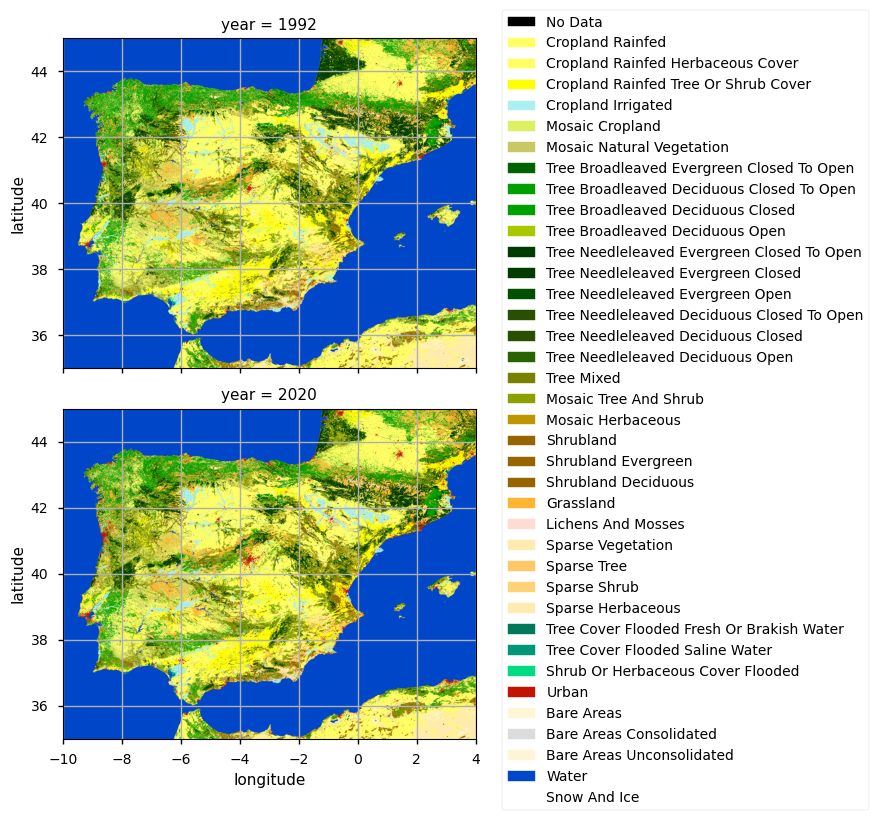

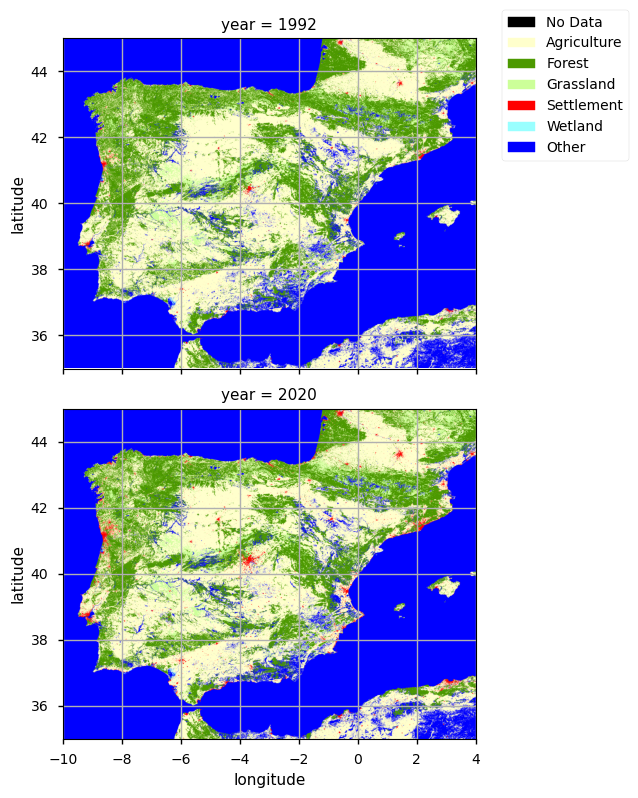

In [7]:
# Adjust the size of the figure and legend to make maps bigger and the legend smaller
for legend_dict in [None, ipcc_dict]:
    plot.lccs_map(
        ds["lccs_class"],
        row="year",
        legend_dict=legend_dict,
        interpolation="antialiased",
        figsize=(5, 8)  # Set the figure size 
    )
    plt.show()


(C3S2_D520.5.3.2b_Quality_Assessment_User_Questions_LULC_UQ1_v1.17:code-section-3)=
### 3. Calculate total area and area percentage of change in for AoI by LC classes

To further identify changes in LC patterns, in this user question, NUTS 2 will be used, providing the information reggarding the main regions/parcels of the Iberian Peninsula.

The NUTS are a hierarchical system divided into 3 levels (https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts). NUTS 1 correspond to major socio-economic regions, NUTS 2 correspond to basic regions for the application of regional policies, and NUTS 3 correpsond to small regions for specific diagnoses. Additionally a NUTS 0 level, usually co-incident with national boundaries is also available. The NUTS legislation is periodically amended; therefore multiple years are available for download. 


The step below masks the Land Cover data according to the NUTS 2 boundaries and calculate the area of each pixel (weighted by Latitude). For each NUTS 2, we proceed with the analysis and visual inspection of Land Cover areas per class and corresponding percentages during the selected period.

#### Mask regions

First, we need to establish the geometry of the NUTS region (level 2) in order to make the corresponding statistics.

In [8]:
# Shapefile with regions (NUTS2)
shapefile_url = "https://gisco-services.ec.europa.eu/distribution/v2/nuts/shp/NUTS_RG_20M_2021_4326.shp.zip" #NUTS2 download path

In [9]:
# Define the CRS for the Iberian Peninsula (WGS84)
crs = "epsg:4326"  # EPSG code for WGS84 (latitude/longitude)

# Data filter: load the shapefile and filter for NUTS2 regions in Spain and Portugal
gdf = gpd.read_file(shapefile_url)  # Read the shapefile NUTS2
gdf = gdf[gdf["LEVL_CODE"] == 2]  # Keep only features at the second administrative level (NUTS2)
gdf = gdf[gdf["NUTS_ID"].str.startswith(("ES", "PT"))]  # Keep only NUTS2 regions for Spain (ES) and Portugal (PT)
gdf = gdf.to_crs(crs)  # Ensure CRS is consistent with the dataset

# Create a mask for the NUTS2 regions that intersect with the Iberian Peninsula
regions = regionmask.from_geopandas(gdf, names="NUTS_NAME")  # Create regions mask based on GeoPandas DataFrame

# Apply the mask to the dataset
mask = regions.mask(ds["longitude"], ds["latitude"])

# Only keep land areas (not ocean) by applying the mask
# This ensures that only land pixels are used in the area calculations
ds = ds.where(mask.notnull(), drop=True)  # Drop ocean pixels that are outside the NUTS2 regions

#### Compute cell area

Then, we can calculate the area of each pixel taking into consideration the curvature of the earth (i.e., weighted by Latitude).

[If you want to know more](https://rdrr.io/cran/raster/man/area.html) 

In [10]:
# Calculate Pixel Area after applying the mask
scaling_factor = 0.002778  # Define a scaling factor for conversion
resolution_km = scaling_factor * 111.195  # Calculate the grid cell resolution in kilometers
indexes = xr.DataArray(range(ds.sizes["latitude"]), dims="latitude")  # Create an array of latitude indexes
lats = ds["latitude"].max() - indexes * scaling_factor
grid_cell_area = resolution_km**2 * np.cos(np.radians(lats))
grid_cell_area.attrs = {
    "standard_name": "cell_area",
    "long_name": "Area",
    "units": "km2",
}
ds = ds.assign_coords(cell_area=grid_cell_area)

#### Bar Charts - Iberian Peninsula

Having the area calculated and the NUTS 2 regions assigned to each pixel, we can now proceed to create the plots of the LC areas per class, by year. First, let's inspect the total area of each LC class in this AoI. We will use the original LC classes to highlight which ones have more significant changes.

In [11]:
#Fuction to calculate class area with original classes
def calculate_area_by_class(ds, cell_area, year):
    # Select the data for the given year
    ds_year = ds.sel(year=year)
    
    # Initialize a dictionary to store the area for each land cover class
    area_by_class = {}
    
    # Loop over each unique land cover class (lccs_class)
    for lc_class in np.unique(ds_year['lccs_class'].values):
        # Create a mask for the current LC class
        mask = ds_year['lccs_class'] == lc_class
        
        # Calculate the total area for the current LC class
        total_area = cell_area.where(mask).sum().compute()  # Use .compute() to get the result
        area_by_class[lc_class] = total_area
    
    return area_by_class

# Calculate areas for 1992 and 2020
area_1992 = calculate_area_by_class(ds, ds["cell_area"], 1992)
area_2020 = calculate_area_by_class(ds, ds["cell_area"], 2020)

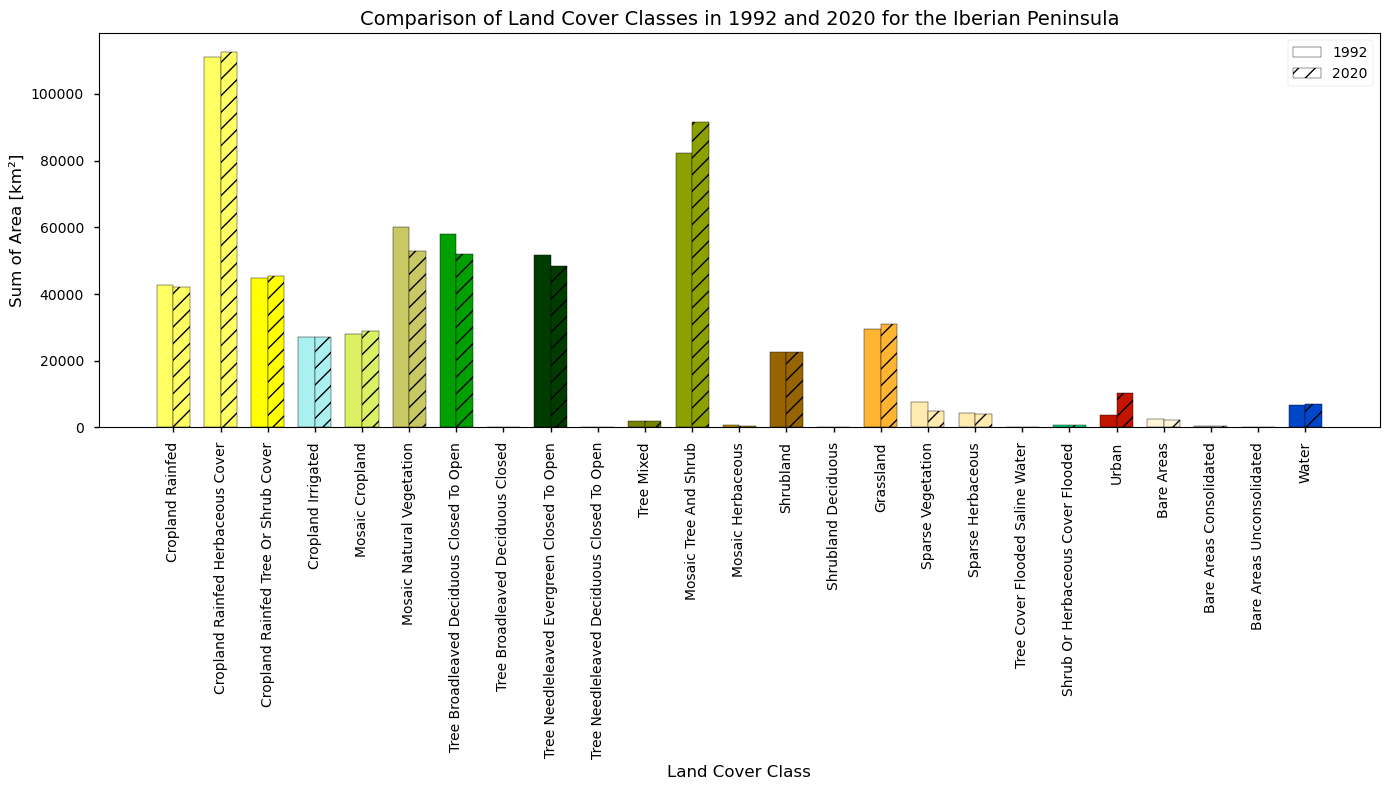

In [12]:
# Filter out NaN values from lc_classes
lc_classes = [lc_class for lc_class in np.unique(ds["lccs_class"].values) if not np.isnan(lc_class)]

# Reverse the lccs_dict to map from numeric values to class names
numeric_to_name = {value[1]: key for key, value in lccs_dict.items()}
numeric_to_color = {value[1]: value[0] for key, value in lccs_dict.items()}

# Loop over the dataset to calculate the area for each class and yea
for year, ds_year in ds.groupby("year"):
    for lc_class in lc_classes:
        # Create a mask for the current LC class
        mask = ds_year["lccs_class"] == lc_class
        total_area = ds_year["cell_area"].where(mask).sum().compute()  # Sum the area for each class
        
        # Assign the total area to the corresponding year dictionary
        if year == 1992:
            area_1992[lc_class] = total_area
        elif year == 2020:
            area_2020[lc_class] = total_area

# Convert the areas dictionaries to lists in the order of lc_classes for plotting
areas_1992_list = [area_1992.get(lc_class, 0) for lc_class in lc_classes]
areas_2020_list = [area_2020.get(lc_class, 0) for lc_class in lc_classes]

# Get class names and colors from the reversed dictionary (numeric_to_name and numeric_to_color)
class_names = [numeric_to_name.get(int(lc_class), 'Unknown') for lc_class in lc_classes]
colors = [numeric_to_color.get(int(lc_class), '#000000') for lc_class in lc_classes]

# Set the width for the bars
bar_width = 0.35
index = np.arange(len(lc_classes))

# Plot both years in the same figure
plt.figure(figsize=(14, 8))

# Plot bars for 1992 with black edges and solid colors (alpha=1 ensures no transparency)
plt.bar(index, areas_1992_list, bar_width, label='1992', color=colors, edgecolor='black', alpha=1)

# Plot bars for 2020 next to 1992, with hatching, black edges, and no transparency
plt.bar(index + bar_width, areas_2020_list, bar_width, label='2020', color=colors, edgecolor='black', hatch='//', alpha=1)

# Customize the plot
plt.xlabel('Land Cover Class', fontsize=12)
plt.ylabel('Sum of Area [km²]', fontsize=12)
plt.title('Comparison of Land Cover Classes in 1992 and 2020 for the Iberian Peninsula', fontsize=14)
plt.xticks(index + bar_width / 2, class_names, rotation=90)  # Set class names as x-ticks

legend_handles = [
    patches.Patch(facecolor='white', edgecolor='black', label='1992'),
    patches.Patch(facecolor='white', edgecolor='black', hatch='//', label='2020')
]
plt.legend(handles=legend_handles)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



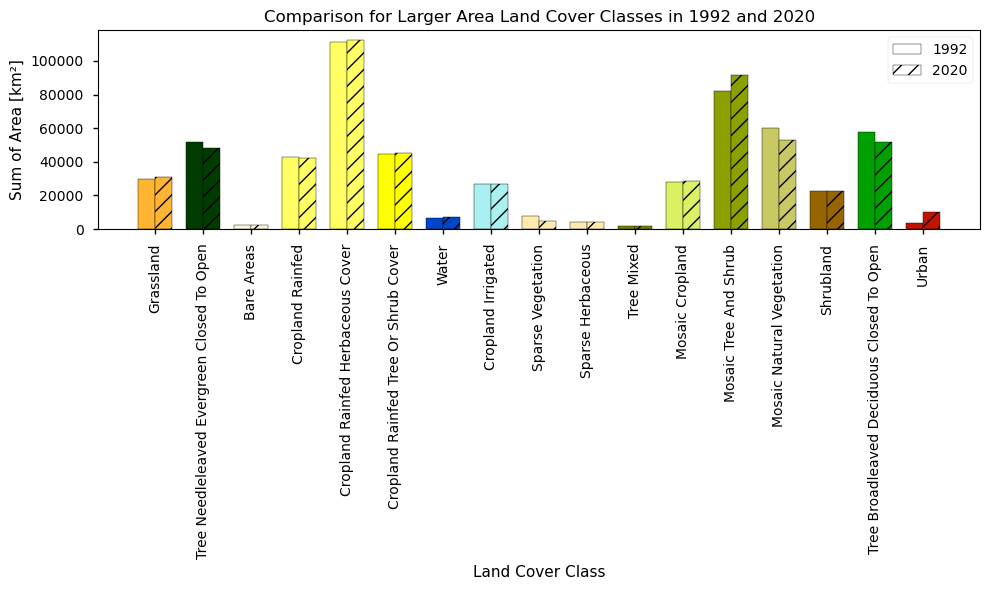

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define a threshold for classes with areas above or below a specific value (km²). 
# Be aware that you will need to change the '>=' and '<=' further in this code cell
area_threshold = 1000  # Classes with more than x km², adjust accordingly

# Initialize dictionaries to store the total area for each class for both years
areas_1992 = {}
areas_2020 = {}

# Get all land cover classes (numeric codes)
lc_classes = np.unique(ds["lccs_class"])

# Loop over the dataset to calculate the area for each class and year
for year, ds_year in ds.groupby("year"):
    for lc_class in lc_classes:
        # No need to skip the water class anymore
        mask = ds_year["lccs_class"] == lc_class
        total_area = ds_year["cell_area"].where(mask).sum().compute()  # Sum the area for each class

        # Store the total area for each class in the corresponding year dictionary
        if year == 1992:
            areas_1992[lc_class] = total_area
        elif year == 2020:
            areas_2020[lc_class] = total_area

# Filter for large or smaller areas and prepare lists for plotting
areas_1992 = {lc: area for lc, area in areas_1992.items() if area >= area_threshold and not np.isnan(lc)} # Change the '>=' and '<=' to ajust if you want to asses above or below the defined treshold
areas_2020 = {lc: area for lc, area in areas_2020.items() if area >= area_threshold and not np.isnan(lc)} # Change the '>=' and '<=' to ajust if you want to asses above or below the defined treshold

# Map numeric codes to class names, assuming the values in your dictionary are codes.
codes_to_names = {value[1]: key for key, value in lccs_dict.items()}

# Prepare data for plotting
lc_classes_large = list(set(areas_1992.keys()).union(set(areas_2020.keys())))
areas_1992_list = [areas_1992.get(lc, 0) for lc in lc_classes_large]
areas_2020_list = [areas_2020.get(lc, 0) for lc in lc_classes_large]
class_names = [codes_to_names.get(int(lc), 'Unknown') for lc in lc_classes_large]
colors = [lccs_dict[class_name][0] for class_name in class_names]  # Extracting colors using class names from lccs_dict

# Plotting
index = np.arange(len(lc_classes_large))
bar_width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(index, areas_1992_list, bar_width, label='1992', color=colors, edgecolor='black', alpha=1)
plt.bar(index + bar_width, areas_2020_list, bar_width, label='2020', color=colors, edgecolor='black', hatch='//', alpha=1)

plt.xlabel('Land Cover Class')
plt.ylabel('Sum of Area [km²]')
plt.title('Comparison for Larger Area Land Cover Classes in 1992 and 2020')
plt.xticks(index + bar_width / 2, class_names, rotation=90)

legend_handles = [
    patches.Patch(facecolor='white', edgecolor='black', label='1992'),
    patches.Patch(facecolor='white', edgecolor='black', hatch='//', label='2020')
]
plt.legend(handles=legend_handles)

plt.tight_layout()
plt.show()



#### Plot Analysis
From these plots, the 'Urban' class seems to show the largest change between 1992 and 2020, despite being the second class with the lowest total area. In addition, the 'Water' class has the greatest area in this AoI - this is expected as it is surounded by the Atlantic and Mediterranean.

To better highlight theses aspects, let's calculate the number of pixels subject to LC changes, and plot the results as percentages. To do that, we define a simple label_counter function to calculate the number of pixels per class in 1992 and 2020, and then proceed with the percentage difference calculation.

In [19]:
# Count the number of pixel per LC class
def label_counter(image, labels_list):
    pixel_count = {}

    for label in labels_list:   
        mask = image == label
        pixel_count[label] = mask.sum()
        
    return pixel_count

In [20]:
# Function to calculate the percentage differences in pixel counts for each LC class between 1992 and 2020
unique_lccs_classes = [lccs_class[1] for lccs_class in lccs_dict.values()]

# Calculate pixel counts for 1992 and 2020
pixel_count_1992 = label_counter(ds.lccs_class.values[0], unique_lccs_classes)
pixel_count_2020 = label_counter(ds.lccs_class.values[1], unique_lccs_classes)

difference_dict = {}

# Loop through each LC class to calculate the percentage difference
for lccs_class in unique_lccs_classes:
    if pixel_count_1992[lccs_class] > 0:  # Avoid division by zero
        difference = (pixel_count_2020[lccs_class] - pixel_count_1992[lccs_class]) / pixel_count_1992[lccs_class] * 100
        difference_dict[lccs_class] = difference
    else:
        difference_dict[lccs_class] = np.nan  # Handle zero pixel count in 1992 (set to NaN or 0 as needed)


In [21]:
# Create a new dictionary to store the updated tuples
updated_lccs_dict = {}

# Loop through the keys of dict1
for key in lccs_dict.keys():
    # Use the second array value as key to match with the keys of dict2
    key_difference_dict = lccs_dict[key][1]
    # If the key exists in dict2, add the 'results' array from dict2 to the tuple of dict1
    if key_difference_dict in difference_dict:
        updated_tuple = tuple(list(lccs_dict[key]) + [difference_dict[key_difference_dict]])
        updated_lccs_dict[key] = updated_tuple

# Now updated_dict1 contains the updated tuples based on the second array values
print(updated_lccs_dict)


{'No Data': ('#000000', 0, nan), 'Cropland Rainfed': ('#ffff64', 10, -1.3167444095008671), 'Cropland Rainfed Herbaceous Cover': ('#ffff64', 11, 1.390817664604471), 'Cropland Rainfed Tree Or Shrub Cover': ('#ffff00', 12, 1.2805180217384122), 'Cropland Irrigated': ('#aaf0f0', 20, 0.09425045234815954), 'Mosaic Cropland': ('#dcf064', 30, 3.2285246974157666), 'Mosaic Natural Vegetation': ('#c8c864', 40, -11.803737194591228), 'Tree Broadleaved Evergreen Closed To Open': ('#006400', 50, nan), 'Tree Broadleaved Deciduous Closed To Open': ('#00a000', 60, -10.554162808565968), 'Tree Broadleaved Deciduous Closed': ('#00a000', 61, 0.0), 'Tree Broadleaved Deciduous Open': ('#aac800', 62, nan), 'Tree Needleleaved Evergreen Closed To Open': ('#003c00', 70, -6.677060709268345), 'Tree Needleleaved Evergreen Closed': ('#003c00', 71, nan), 'Tree Needleleaved Evergreen Open': ('#005000', 72, nan), 'Tree Needleleaved Deciduous Closed To Open': ('#285000', 80, 0.0), 'Tree Needleleaved Deciduous Closed': ('#

Having calculated the percentage difference, we can now have a look at the results. Please note that percentage differences are calculated per class level - i.e., the changes in number of pixel in each class (between 1992 and 2020) are divided by the total number of pixels in that same class in 1992. Hence, these percentages reflect relative per-class changes.

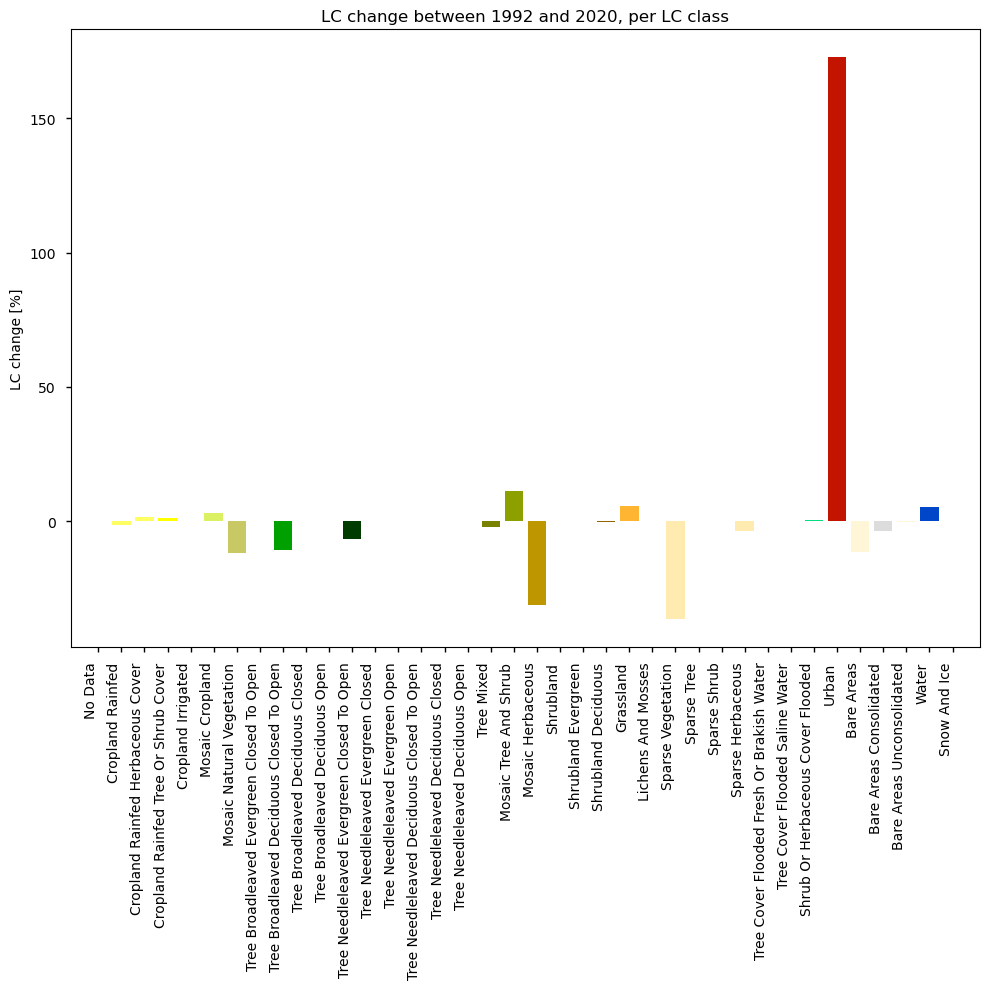

In [22]:
# Generate bar-chart with LC class change percentages in each year
keys = list(lccs_dict.keys())

results_values = [item[-1] for item in updated_lccs_dict.values()]

# Move the colors two units forward to match the corresponding keys
bar_colors = [item[0] for item in updated_lccs_dict.values()]

# Create a bar chart with specified colors
plt.figure(figsize=(10, 10))
bars = plt.bar(keys, results_values, color=bar_colors)

# Customize the plot (if needed)
plt.title("LC change between 1992 and 2020, per LC class", fontsize=12)
# plt.xlabel("Keys", fontsize=14)
plt.ylabel("LC change [%]", fontsize=10)
plt.xticks(rotation=90, ha='right', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

From this plot, we can verify that the 'Urban' class has indeed changed the most between 1992 and 2020 - in this AoI, 'Urban' areas have increased by more than 150%! By contrast, several vegetation classes have been reduced, although with percentages more evenly distributed accross different classes (e.g., broadleaved and needleleaved tree cover classes). 

(C3S2_D520.5.3.2b_Quality_Assessment_User_Questions_LULC_UQ1_v1.17:code-section-4)=
### 4. Calculate the area percentage and the area percentage change for the most populated regions

#### Bar Charts - NUTS2

Having found the 'urbanization' pattern in this AoI, we can now look into specific NUTS 2 regions, in more detail. In particular, we will select those that include the greatest Iberian cities, in terms of population number. These statistics are retrieved from the Urban Audit Indicators database available at  European Commission - Eurostat.
The selected NUTS 2 regions are:
- Comunidad de Madrid, which includes the city of Madrid (5 098 717 people, in 2020), capital of Spain;
- Cataluña, which includes the city of Barcelona (3 755 512 people, in 2020);
- Área Metropolitana de Lisboa, which includes Lisboa (1 872 036 people, in 2020), capital of Portugal;
- Comunitat Valenciana, which includes Valencia (1 417 464 people, in 2020);
- Norte, which includes Porto (955 864 people, in 2020).

We will look at each one in terms of area percentages, now using the IPCC classes to highlight the more aggregated LC changes.

#### Calculation of the percentage area, absolute change, and relative percentage change for each IPCC class category

1. **Area Percentage Coverage**:  
   *Example*: In 1992, forest land covered 35% of the total area, while urban areas occupied 10%. By 2020, forest coverage decreased to 30%, and urban areas expanded to 15%. This metric gives the proportion of the total land occupied by each land cover class.

2. **Absolute Percentage Difference**:  
   *Example*: In 1992, 10% of the region was classified as agricultural land. By 2020, this had decreased to 8%. The absolute percentage difference in agricultural land coverage is −2% (from 10% in 1992 to 8% in 2020, representing a 2% decrease in total land area occupied by agriculture).

3. **Relative Percentage Difference**:  
   *Example*: In 1992, 10% of the area was classified as wetlands. By 2020, wetlands accounted for 12% of the total area. The relative percentage difference is calculated as ((12−10)/10)∗100 = +20%. This means there was a 20% increase in wetland area relative to its size in 1992.

In [23]:
# Filter the GeoDataFrame to include only the regions of interest
regions= ["Comunidad de Madrid", "Cataluña", "Área Metropolitana de Lisboa", "Comunitat Valenciana", "Norte"]

gdf_filtered = gdf[gdf['NUTS_NAME'].isin(regions)]
gdf_filtered = gdf_filtered.to_crs("EPSG:4326")


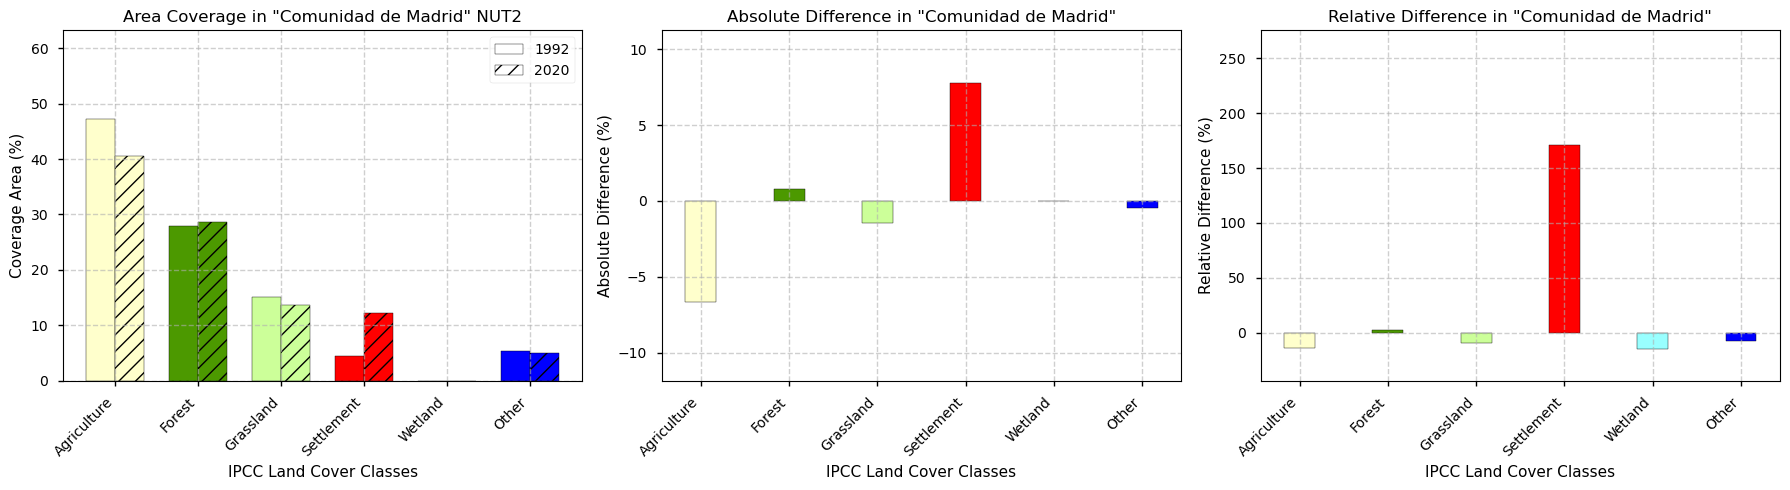

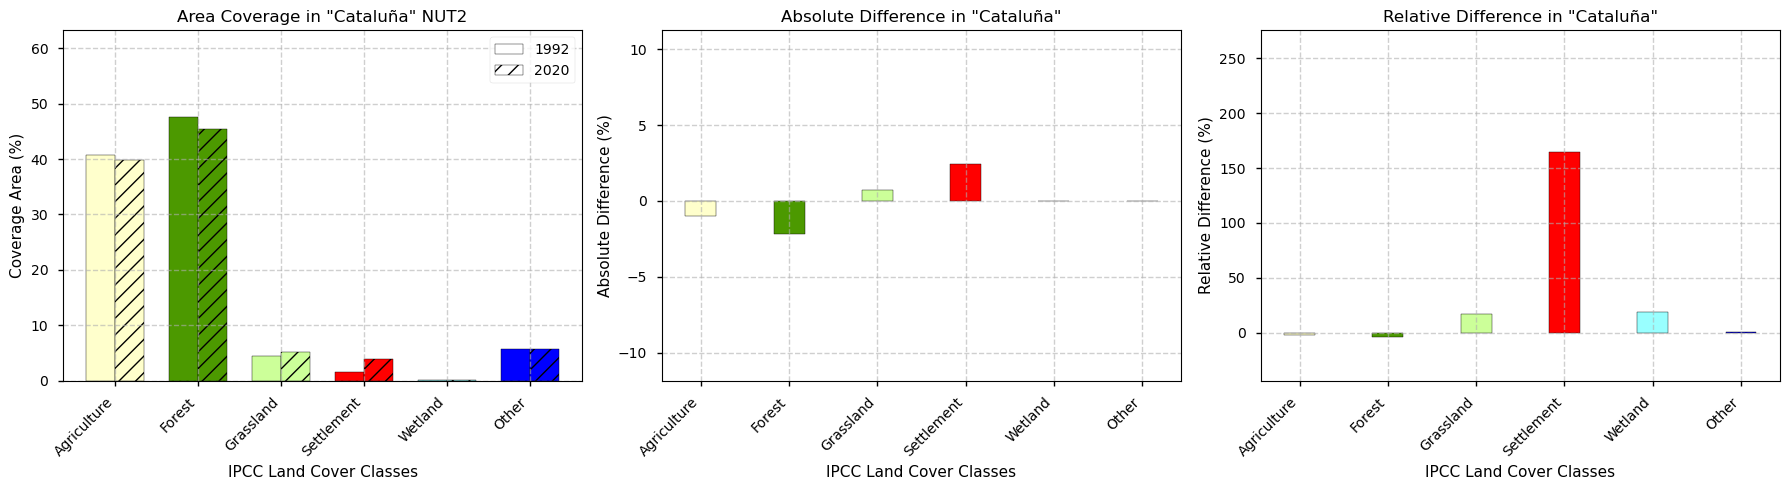

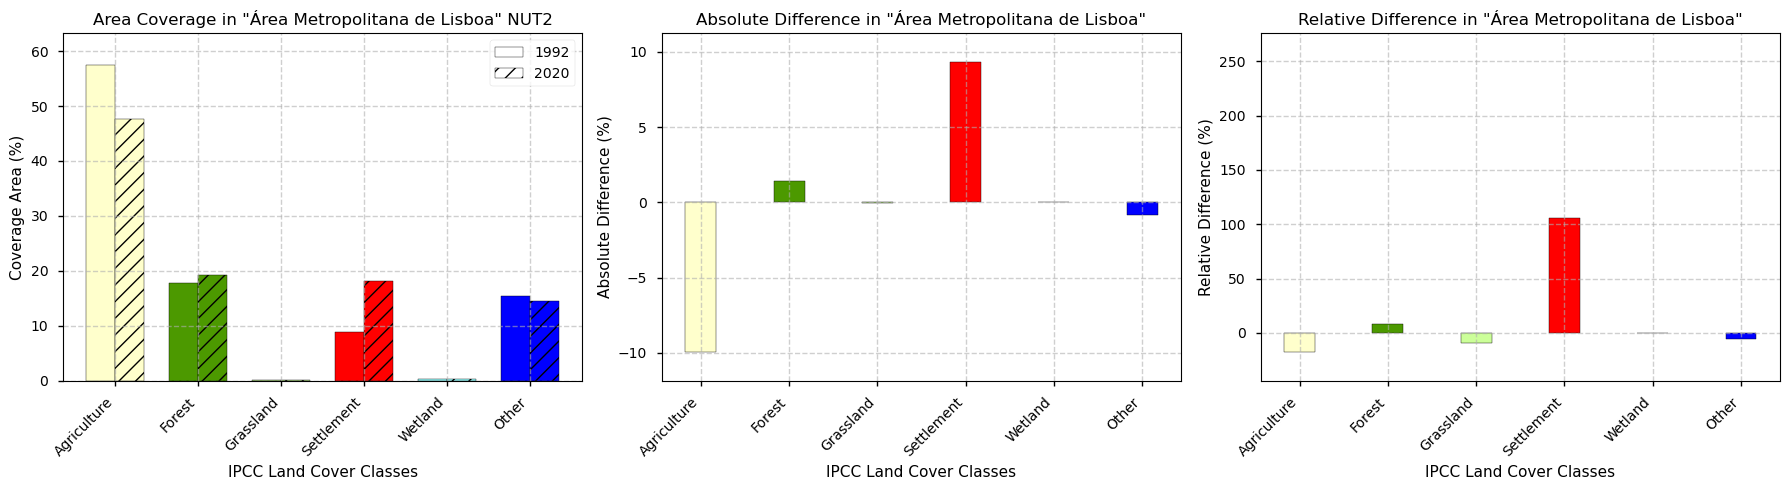

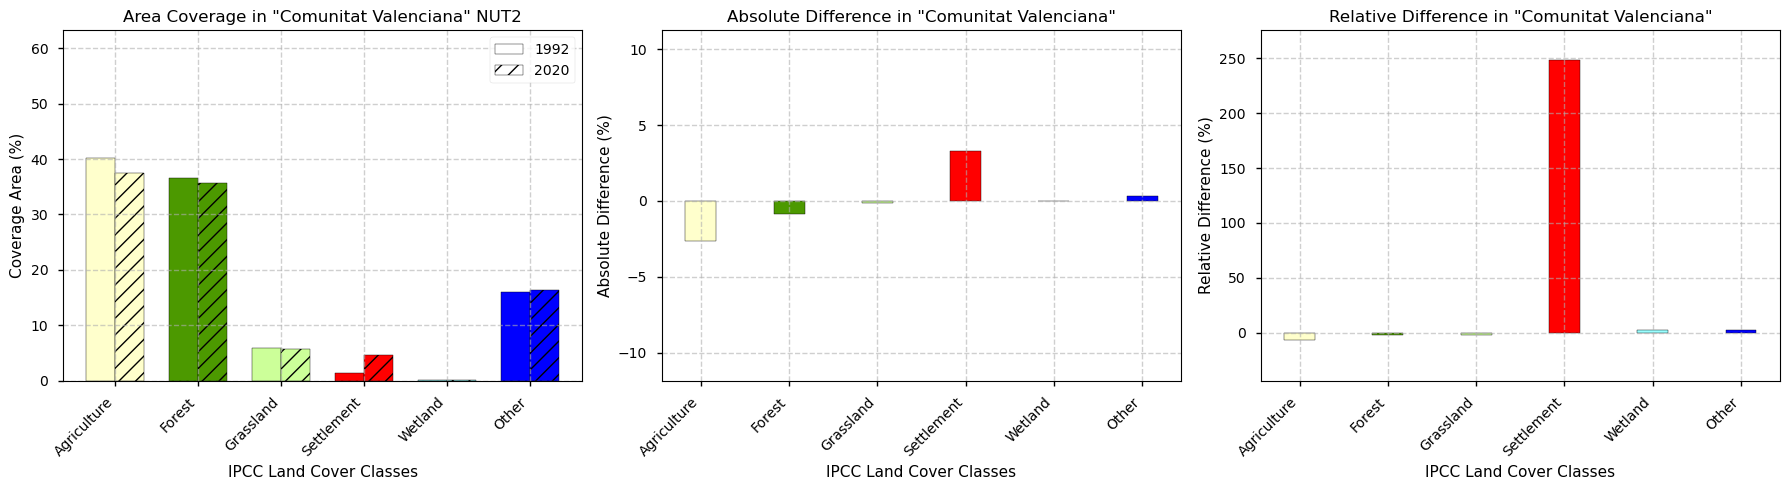

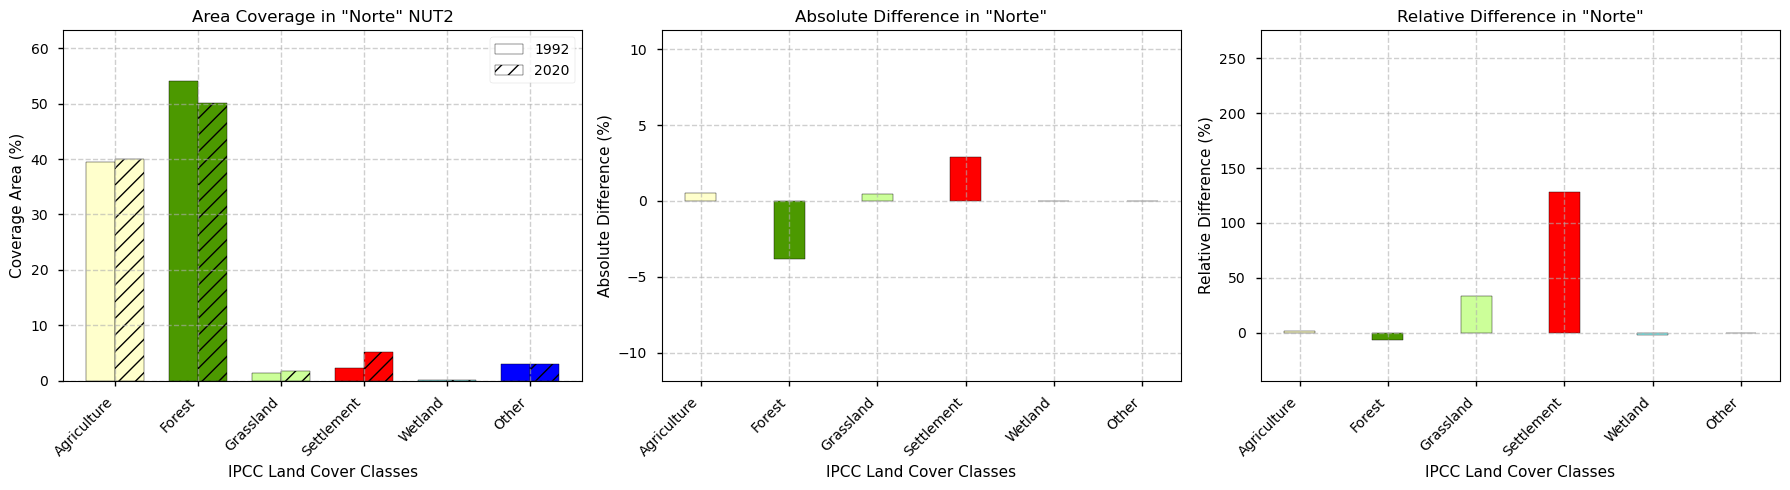

In [24]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import geopandas as gpd
from shapely.vectorized import contains

# Function to calculate the percentage cover of each IPCC class for a given year in a given region
def calculate_ipcc_percentage_coverage(year, region_mask, total_area_region):
    lccs_year = ds["lccs_class"].sel(year=year)  # Select data for the given year

    # Mask the lccs_year data with the region mask
    lccs_region_year = lccs_year.where(region_mask == 1)  # Mask out pixels not in the region

    # Initialize a dictionary to store the area per IPCC group
    ipcc_area = {group: 0 for group in ipcc_dict.keys()}

    # Loop through each IPCC group and sum the corresponding areas
    for group, (_, lccs_values) in ipcc_dict.items():
        ipcc_mask = xr.where(np.isin(lccs_region_year, lccs_values), 1, 0)
        group_area = (ipcc_mask * cell_area_expanded).sum().item()  # Summing all valid pixels' areas
        ipcc_area[group] = group_area

    # Calculate the percentage coverage for each IPCC group within the region area
    ipcc_percentage_coverage = {group: (area / total_area_region) * 100 for group, area in ipcc_area.items()}
    
    return ipcc_percentage_coverage

# Function to calculate absolute and relative percentage differences
def calculate_differences(coverage_1992, coverage_2020):
    absolute_differences = {}
    relative_differences = {}
    
    for group in coverage_1992.keys():
        # Absolute percentage difference: (2020 - 1992)
        abs_diff = coverage_2020[group] - coverage_1992[group]
        absolute_differences[group] = abs_diff
        
        # Handle relative differences, avoid division by zero
        if coverage_1992[group] > 0:
            rel_diff = ((coverage_2020[group] - coverage_1992[group]) / coverage_1992[group]) * 100
        else:
            rel_diff = 0  # Set a safe default if the base year value is zero
        relative_differences[group] = rel_diff
    
    return absolute_differences, relative_differences

# Function to set y-axis limits with some padding and handle NaN values
def add_padding_to_limits(min_val, max_val, padding_factor=0.1):
    # If all values are NaN, set default limits (0, 1) to avoid errors
    if not np.isfinite(min_val) or not np.isfinite(max_val):
        return 0, 1  # Default values if min or max are NaN or Inf

    range_val = max_val - min_val
    padding = range_val * padding_factor  # Calculate the padding
    return min_val - padding, max_val + padding

# Function to add padding only to the maximum y-limit for area coverage plots
def add_padding_to_max_limit(min_val, max_val, padding_factor=0.1):
    # If min or max values are NaN or Inf, set default limits (0, 1) to avoid errors
    if not np.isfinite(min_val) or not np.isfinite(max_val):
        return 0, 1  # Default values if min or max are NaN or Inf

    range_val = max_val - min_val
    padding = range_val * padding_factor  # Calculate the padding for the max value
    return min_val, max_val + padding  # Return the original min and padded max


# Plotting function for Area Percentage Coverage without padding for the min limit and excluding "No Data"
def plot_area_percentage_coverage(ax, coverage_1992, coverage_2020, region_name, y_max):
    # Filter out "No Data" from the labels, percentages, and colors
    labels = [key for key in coverage_1992.keys() if key != 'No Data']
    percentages_1992 = [coverage_1992[key] for key in labels]
    percentages_2020 = [coverage_2020[key] for key in labels]
    colors = [ipcc_dict[key][0] for key in labels]
    
    x = np.arange(len(labels))  # Label locations
    width = 0.35  # Width of the bars

    # Plot bars for 1992 and 2020
    ax.bar(x - width/2, percentages_1992, width, label='1992', color=colors, edgecolor='black')
    ax.bar(x + width/2, percentages_2020, width, label='2020', color=colors, edgecolor='black', hatch='//')
    
    ax.set_xlabel('IPCC Land Cover Classes')
    ax.set_ylabel('Coverage Area (%)')
    ax.set_title(f'Area Coverage in "{region_name}" NUT2')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='right')

    # Set the y-axis limit with no padding for the minimum and padding for the maximum
    min_area, max_area = add_padding_to_max_limit(0, y_max)  # Fix min_area at 0, pad only the max_area
    ax.set_ylim(min_area, max_area)
    ax.grid(True, linestyle='--', alpha=0.6)

    # Custom legend with patches for 1992 and 2020
    legend_handles = [
        patches.Patch(facecolor='white', edgecolor='black', label='1992'),
        patches.Patch(facecolor='white', edgecolor='black', hatch='//', label='2020')
    ]
    ax.legend(handles=legend_handles)

# Plotting function for Absolute and Relative Differences
def plot_percentage_differences(ax1, ax2, abs_diff, rel_diff, region_name, y_max_abs, y_min_abs, y_max_rel, y_min_rel):
    labels = [key for key in abs_diff.keys() if key != 'No Data']
    abs_diffs = [abs_diff[key] for key in labels]
    rel_diffs = [rel_diff[key] for key in labels]
    colors = [ipcc_dict[key][0] for key in labels]
    
    x = np.arange(len(labels))  # Label locations
    width = 0.35  # Width of the bars
    
    # Plot bars for Absolute Percentage Differences
    ax1.bar(x, abs_diffs, width, color=colors, edgecolor='black')
    ax1.set_xlabel('IPCC Land Cover Classes')
    ax1.set_ylabel('Absolute Difference (%)')
    ax1.set_title(f'Absolute Difference in "{region_name}"')
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, rotation=45, ha='right')
    
    # Set y-axis limits for absolute difference with global min and max
    min_abs, max_abs = add_padding_to_limits(y_min_abs, y_max_abs)
    ax1.set_ylim(min_abs, max_abs)
    ax1.grid(True, linestyle='--', alpha=0.6)

    # Plot bars for Relative Percentage Differences
    ax2.bar(x, rel_diffs, width, color=colors, edgecolor='black')
    ax2.set_xlabel('IPCC Land Cover Classes')
    ax2.set_ylabel('Relative Difference (%)')
    ax2.set_title(f'Relative Difference in "{region_name}"')
    ax2.set_xticks(x)
    ax2.set_xticklabels(labels, rotation=45, ha='right')

    # Set y-axis limits for relative difference with global min and max
    min_rel, max_rel = add_padding_to_limits(y_min_rel, y_max_rel)
    ax2.set_ylim(min_rel, max_rel)
    ax2.grid(True, linestyle='--', alpha=0.6)

# First loop over each region to find the global maximum and minimum y-axis limits
max_area_percentage_coverage = 0
max_absolute_difference = 0
max_relative_difference = 0
min_absolute_difference = 0
min_relative_difference = 0

for region_name in regions:
    region_of_interest = gdf_filtered[gdf_filtered["NUTS_NAME"] == region_name]

    # Get the region mask and total area (as in the original code)
    region_geometry = region_of_interest.geometry.unary_union
    latitudes = ds['latitude'].values
    longitudes = ds['longitude'].values
    lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)
    region_mask = contains(region_geometry, lon_grid, lat_grid)
    region_mask = xr.DataArray(region_mask, coords=[ds['latitude'], ds['longitude']], dims=["latitude", "longitude"])
    cell_area_expanded = ds["cell_area"].expand_dims({"longitude": ds.sizes["longitude"]}, axis=1)
    total_area_region = (region_mask * cell_area_expanded).sum().item()

    if total_area_region == 0:
        print(f"Warning: Total area for region {region_name} is zero. Skipping this region.")
        continue

    # Calculate the percentage coverage for 1992 and 2020
    coverage_1992 = calculate_ipcc_percentage_coverage(1992, region_mask, total_area_region)
    coverage_2020 = calculate_ipcc_percentage_coverage(2020, region_mask, total_area_region)

    # Calculate the differences
    abs_diff, rel_diff = calculate_differences(coverage_1992, coverage_2020)

    # Update the global minimum and maximum values
    max_area_percentage_coverage = max(max_area_percentage_coverage, max(list(coverage_1992.values()) + list(coverage_2020.values())))
    max_absolute_difference = max(max_absolute_difference, max(abs_diff.values()))
    max_relative_difference = max(max_relative_difference, max(rel_diff.values()))

    # Track global minimums as well
    min_absolute_difference = min(min_absolute_difference, min(abs_diff.values()))
    min_relative_difference = min(min_relative_difference, min(rel_diff.values()))

# Now loop again over each region and plot using the global y-axis limits
for region_name in regions:
    region_of_interest = gdf_filtered[gdf_filtered["NUTS_NAME"] == region_name]

    # Get the region mask and total area (as in the original code)
    region_geometry = region_of_interest.geometry.unary_union
    latitudes = ds['latitude'].values
    longitudes = ds['longitude'].values
    lon_grid, lat_grid = np.meshgrid(longitudes, latitudes)
    region_mask = contains(region_geometry, lon_grid, lat_grid)
    region_mask = xr.DataArray(region_mask, coords=[ds['latitude'], ds['longitude']], dims=["latitude", "longitude"])
    cell_area_expanded = ds["cell_area"].expand_dims({"longitude": ds.sizes["longitude"]}, axis=1)
    total_area_region = (region_mask * cell_area_expanded).sum().item()

    if total_area_region == 0:
        print(f"Warning: Total area for region {region_name} is zero. Skipping this region.")
        continue

    # Calculate the percentage coverage for 1992 and 2020
    coverage_1992 = calculate_ipcc_percentage_coverage(1992, region_mask, total_area_region)
    coverage_2020 = calculate_ipcc_percentage_coverage(2020, region_mask, total_area_region)

    # Calculate the differences
    abs_diff, rel_diff = calculate_differences(coverage_1992, coverage_2020)

    # Create the figure with three subplots in the same row
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    # Plot the Area Percentage Coverage
    plot_area_percentage_coverage(ax1, coverage_1992, coverage_2020, region_name, max_area_percentage_coverage)

    # Plot the Absolute and Relative Percentage Differences with global minimum and maximum values
    plot_percentage_differences(ax2, ax3, abs_diff, rel_diff, region_name, 
                                max_absolute_difference, min_absolute_difference, 
                                max_relative_difference, min_relative_difference)

    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()


### **Bar Chart Analysis**
#### **1. Area Coverage (1992 vs. 2020)**

Across the four regions, significant land cover changes were observed in the Settlement and Agriculture classes, while Forest and Grassland exhibited more stable trends. Wetland and Other land cover classes remain consistently low, with minimal variations.

* **Agriculture**
        All four regions display a decrease in agricultural land from 1992 to 2020. This trend is most prominent in Área Metropolitana de Lisboa, where the agricultural area saw the largest drop, while Comunidad de Madrid and Cataluña show more moderate decreases.

* **Forest**
        Forest cover remained relatively stable, with slight decreases in Comunidad de Madrid and Cataluña, but small increases in Área Metropolitana de Lisboa and Comunitat Valenciana. This suggests that forest areas have been largely preserved or even expanded slightly in some regions.

* **Grassland**
        Grassland exhibited minor changes, with slight increases in Cataluña and Comunitat Valenciana, but a reduction in Comunidad de Madrid. Área Metropolitana de Lisboa also shows very little change, indicating a stable trend for grasslands across the regions.

* **Settlement**
        A striking increase in urban/settlement areas is observed across all four regions. The growth in settlement land is particularly prominent in Área Metropolitana de Lisboa and Comunidad de Madrid, signaling significant urban expansion and possibly population growth or urban development in these areas.

* **Wetland and Other**
        Both categories have minimal land cover percentages across the four regions. Slight increases in the Other category were noted in Área Metropolitana de Lisboa and Comunitat Valenciana, but overall, their contribution to total land cover remains negligible.

#### **2. Absolute Difference in Land Cover (2020 vs. 1992)**

The absolute difference analysis highlights how much the land cover changed between the two periods.

* **Agriculture**
        The largest absolute reduction in agricultural land is observed in Área Metropolitana de Lisboa, with a decline of around 10%. Other regions, such as Comunidad de Madrid, Cataluña, and Comunitat Valenciana, saw less significant but still noticeable reductions (~5%).

* **Forest**
        Forest areas showed minimal change in absolute terms across the regions. In Cataluña and Comunitat Valenciana, forest cover remained almost constant, while Área Metropolitana de Lisboa saw a slight increase (~5%).

* **Grassland**
        Grassland areas experienced a small absolute increase, particularly in Cataluña and Comunitat Valenciana, while Comunidad de Madrid showed a slight decline.

* **Settlement**
        All regions experienced a noticeable absolute increase in settlement areas, with Área Metropolitana de Lisboa and Comunidad de Madrid leading the trend. The absolute difference in settlement cover for these regions is around 10%, reflecting significant urbanization.

* **Wetland and Other**
        The absolute differences for Wetland and Other land cover classes remain negligible, contributing very little to overall land use changes.

#### **3. Relative Difference in Land Cover (2020 vs. 1992)**

The relative difference highlights the proportional change in land cover classes over the period.

* **Agriculture**
        The relative decrease in agriculture is most pronounced in Área Metropolitana de Lisboa, though all regions show a consistent downward trend. The decline is more moderate in Comunitat Valenciana, Cataluña, and Comunidad de Madrid.

* **Forest and Grassland**
        In relative terms, forest and grassland areas show slight increases or stability across the regions, suggesting they have not been as heavily impacted by land use changes as other categories. Forest areas in Área Metropolitana de Lisboa and Comunitat Valenciana saw a slight positive relative difference, while grassland areas in Cataluña and Comunitat Valenciana exhibited modest gains.

* **Settlement**
        The most significant change comes from the Settlement category, which has experienced large relative increases across all regions, often surpassing 200%. This suggests that urbanization has been the dominant land cover change over the period, particularly in regions like Área Metropolitana de Lisboa and Comunitat Valenciana.

* **Wetland and Other**
        Both land cover classes show minimal relative changes. In some regions like Comunitat Valenciana and Área Metropolitana de Lisboa, the Other category experienced slight growth, but overall, these classes continue to represent a very small fraction of total land cover.

#### **Overall Trends**

* **Urbanization/Settlements**
        The most dominant trend across all four regions is the expansion of settlement/urban areas. This is consistent with broader trends of urban sprawl and development, particularly in Área Metropolitana de Lisboa and Comunidad de Madrid, where urban areas have more than doubled in size.

* **Decline in Agriculture**
        Agricultural areas have consistently decreased, with Área Metropolitana de Lisboa experiencing the largest drop. 

* **Stability of Forest and Grassland**
        Forest and grassland areas have remained relatively stable, with some regions even seeing slight increases. 

* **Minimal Change in Wetlands and Other Classes**
        Wetlands and Other land cover types remain negligible and unchanged across the regions, indicating that these land types have not been significantly impacted during the period of analysis.


(C3S2_D520.5.3.2b_Quality_Assessment_User_Questions_LULC_UQ1_v1.17:code-section-5)=
### 5. Main Takeaways


* The dataset shows strong physical consistency with official sources and studies, aligning well with equivalent statistics from EUROSTAT [[3]](https://ec.europa.eu/statistical-atlas/viewer/?ch=gridvizChapter&mids=BKGCNT,totalPop21,CNTOVL&o=1,1,0.7&center=40.94812,-2.2287,5&lcis=totalPop21&) and peer-reviewed research [[1]](https://doi.org/10.1016/j.apgeog.2009.07.003),[[2]](https://doi.org/10.3390/land7030099). The analysis revealed significant urbanization in the AoI from 1992 to 2020, with the IPCC 'Settlement' class (equivalent to the 'Urban' class in LC data) showing substantial increases. In 1992, urban areas comprised a small fraction of NUTS 2 territories, ranging from approximately 2% (Comunitat Valenciana) to 10% (Área Metropolitana de Lisboa). By 2020, this fraction had doubled or more in all cases, especially in regions with large metropolitan areas like Comunidad de Madrid (Spain) and Área Metropolitana de Lisboa (Portugal). This urban expansion came largely at the expense of Agriculture and Grassland areas, except in Norte, where the increase in settlement area was offset by a reduction in Forest. This trend aligns with the overall growth in built-up areas across Europe, as shown by the Joint Research Center (JRC) using the [GHSL dataset](https://human-settlement.emergency.copernicus.eu/datasets.php) [[5]](https://publications.jrc.ec.europa.eu/repository/handle/JRC116711). Despite small discrepancies (5-8%) with EUROSTAT's land categories, the dataset's overall consistency suggests it is reliable, though classification nuances should be considered.

* Urban expansion generally occurred at the expense of Agriculture and Grassland areas, except in the Norte region, where the increase in Settlement area corresponded with a reduction in Forest. These shifts illustrate the spatial trade-offs between land use types. Forest areas, however, have shown minimal change in most regions, reinforcing the idea that urban growth primarily affects agricultural and open land rather than forested areas. Furthermore, although Settlements now occupy a larger share of the land, they still account for less than 20% of the total area in most regions. Forest, Grassland, and Agricultural classes continue to dominate across our AoI. The trade-offs between urban expansion and the decline in agricultural areas are well-documented, with numerous studies highlighting the conversion of agricultural land to urban uses. This pattern has been observed in multiple European regions, where urban growth frequently replaces agricultural land [[4]](https://doi.org/10.1088/1748-9326/9/6/064015).

* The use of two levels of class aggregation allowed for a comprehensive analysis of trends, both from a generalized and more detailed perspective. While this approach introduces some uncertainty due to the aggregation of more granular data, it provides a clearer picture of major trends across land cover classes. This methodological decision was crucial for understanding urban expansion while maintaining the ability to capture more subtle land cover shifts.
Classification methodologies across datasets can introduce uncertainties, particularly when distinguishing between land cover categories like Agriculture and Grassland. For example, certain features (e.g., greenhouses) might be classified as Agriculture in one dataset but as Artificial Land in another. Such discrepancies highlight the need for consistent application of classification rules to avoid misinterpretation. Despite these challenges, the dataset still demonstrates high accuracy and precision in identifying urban expansion trends [[6]](https://www.mdpi.com/2072-4292/15/9/2285).

## ℹ️ If you want to know more

### Key resources

Some key resources and further reading were linked throughout this assessment.

The CDS catalogue entry for the data used were:
* Land cover classification gridded maps from 1992 to present derived from satellite observations:
    (https://cds.climate.copernicus.eu/datasets/satellite-land-cover?tab=overview)

* Product User Guide and Specification of the dataset [version 2.1](https://datastore.copernicus-climate.eu/documents/satellite-land-cover/D5.3.1_PUGS_ICDR_LC_v2.1.x_PRODUCTS_v1.1.pdf) and [version 2.0](https://datastore.copernicus-climate.eu/documents/satellite-land-cover/D3.3.11-v1.0_PUGS_CDR_LC-CCI_v2.0.7cds_Products_v1.0.1_APPROVED_Ver1.pdf) 


Additional resources:
* [Eurostat NUTS](https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts) (Nomenclature of territorial units for statistics)


Code libraries used:
* [C3S EQC custom functions](https://github.com/bopen/c3s-eqc-automatic-quality-control/tree/main/c3s_eqc_automatic_quality_control), `c3s_eqc_automatic_quality_control`,  prepared by [BOpen](https://www.bopen.eu/)


### References

[[1]](https://doi.org/10.1016/j.apgeog.2009.07.003) Feranec, J., Jaffrain, G., Soukup, T., & Hazeu, G. (2010). Determining changes and flows in European landscapes 1990–2000 using CORINE land cover data. Applied geography, 30(1), 19-35.

[[2]](https://doi.org/10.3390/land7030099) Fernández-Nogueira, D., & Corbelle-Rico, E. (2018). Land use changes in Iberian Peninsula 1990–2012. Land, 7(3), 99.   

[[3]](https://ec.europa.eu/statistical-atlas/viewer/?ch=gridvizChapter&mids=BKGCNT,totalPop21,CNTOVL&o=1,1,0.7&center=40.94812,-2.2287,5&lcis=totalPop21&) Eurostat, Statistical Atlas 

[[4]](https://doi.org/10.1088/1748-9326/9/6/064015) Bagan, H., & Yamagata, Y. (2014). Land-cover change analysis in 50 global cities by using a combination of Landsat data and analysis of grid cells. Environmental Research Letters, 9. https://doi.org/10.1088/1748-9326/9/6/064015.

[[5]](https://publications.jrc.ec.europa.eu/repository/handle/JRC116711) Alberti, V. et al (2019) The Future of Cities, Vandecasteele, I., Baranzelli, C., Siragusa, A. and Aurambout, J. editor(s), EUR 29752 EN, Publications Office of the European Union, Luxembourg, 2019, ISBN 978-92-76-03847-4, doi:10.2760/375209, JRC116711.

[[6]](https://www.mdpi.com/2072-4292/15/9/2285) Zhao, T., Zhang, X., Gao, Y., Mi, J., Liu, W., Wang, J., Jiang, M., & Liu, L. (2023). Assessing the Accuracy and Consistency of Six Fine-Resolution Global Land Cover Products Using a Novel Stratified Random Sampling Validation Dataset. Remote. Sens., 15, 2285. https://doi.org/10.3390/rs15092285.

